Original code to find skin

In [ ]:
%pip install opencv-python
import cv2
import numpy as np

#Open a simple image
img=cv2.imread("./training/jaundice/jaundice (1).jpg")

#converting from gbr to hsv color space
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#skin color range for hsv color space 
HSV_mask = cv2.inRange(img_HSV, np.array((0, 15, 0)), np.array((17,170,255))) # hsv
HSV_mask = cv2.morphologyEx(HSV_mask, int(cv2.MORPH_OPEN), np.ones((3,3), np.uint8))

#converting from gbr to YCbCr color space
img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

#skin color range for hsv color space 
YCrCb_mask = cv2.inRange(img_YCrCb, np.array((0, 135, 85)), np.array((255,180,135))) 
YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#merge skin detection (YCbCr and hsv)
global_mask=cv2.bitwise_and(YCrCb_mask,HSV_mask)
global_mask=cv2.medianBlur(global_mask,3)
global_mask = cv2.morphologyEx(global_mask, cv2.MORPH_OPEN, np.ones((4,4), np.uint8))


HSV_result = cv2.bitwise_not(HSV_mask)
YCrCb_result = cv2.bitwise_not(YCrCb_mask)
global_result=cv2.bitwise_not(global_mask)


#show results
cv2.imshow("1_HSV.jpg",HSV_result)
cv2.imshow("2_YCbCr.jpg",YCrCb_result)
cv2.imshow("3_global_result.jpg",global_result)
cv2.imshow("Image.jpg",img)
# cv2.imwrite("1_HSV.jpg",HSV_result)
# cv2.imwrite("2_YCbCr.jpg",YCrCb_result)
# cv2.imwrite("3_global_result.jpg",global_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

code to crop skin part only using hsr

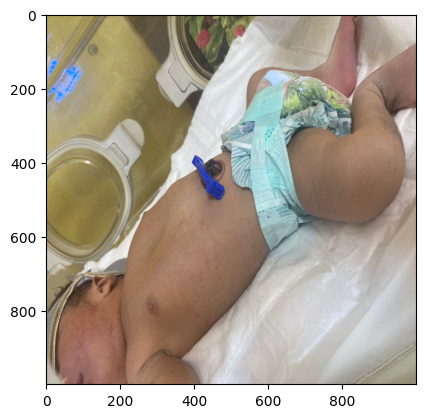

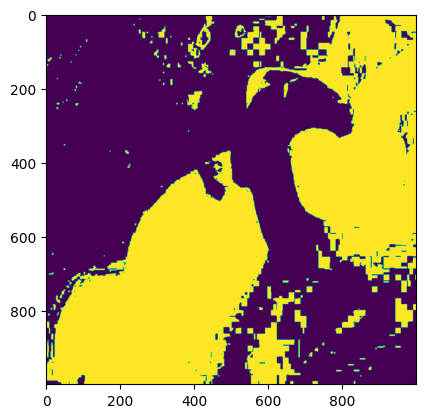

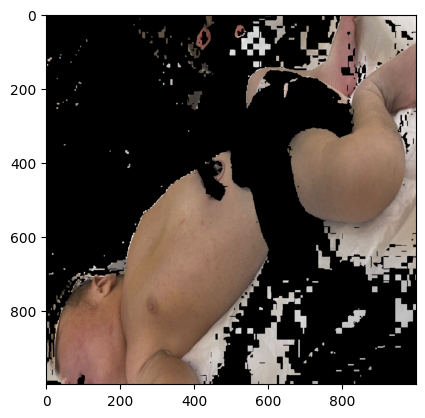

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

# img=cv2.imread("./training/normal/normal (1).jpg")
img=cv2.imread("./training/jaundice/jaundice (1).jpg") #brg

img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

HSV_mask = cv2.inRange(img_HSV[:,:,0], np.array((0)), np.array((17)))
HSV_mask = cv2.morphologyEx(HSV_mask,cv2.MORPH_OPEN,np.ones((3,3),np.uint8))

final_HSV_img = cv2.bitwise_and(img,img,mask = HSV_mask)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(HSV_mask)
plt.show()
plt.imshow(cv2.cvtColor(final_HSV_img,cv2.COLOR_BGR2RGB))
plt.show()
# if cv2.waitKey(0) & 0xff == 27:
#     cv2.destroyAllWindows()

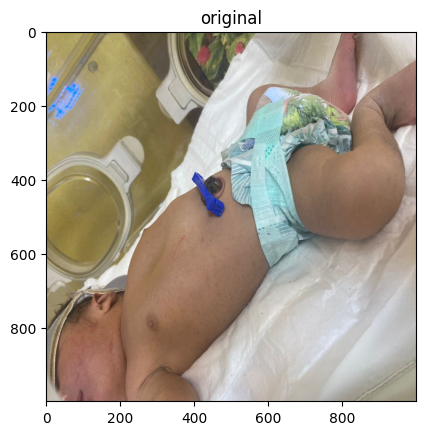

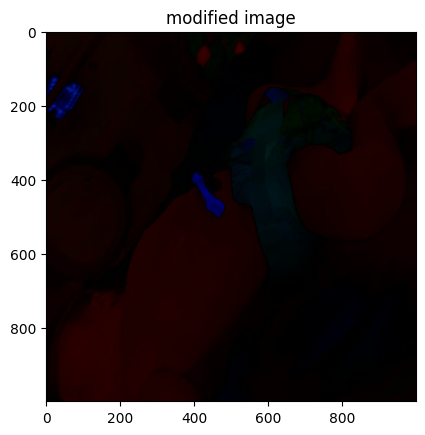

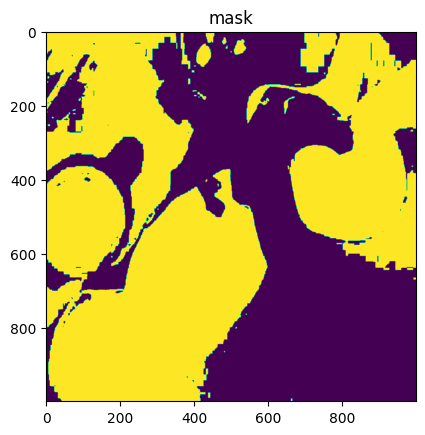

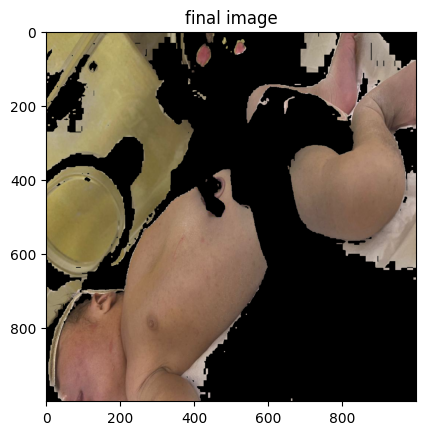

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# img=cv2.imread("./training/normal/normal (1).jpg")
img=cv2.imread("./training/jaundice/jaundice (1).jpg")

#converting from gbr to YCbCr color space
img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
img_YCrCb[:,:,0] = 0

#skin color range for hsv color space 
YCrCb_mask = cv2.inRange(img_YCrCb, np.array((0, 135, 85)), np.array((255,180,135))) 
YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

final_YCrCb_img = cv2.bitwise_and(img,img,mask = YCrCb_mask)

plt.title("original")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()
plt.title("modified image")
plt.imshow(cv2.cvtColor(img_YCrCb,cv2.COLOR_YCrCb2RGB))
plt.show()
plt.title("mask")
plt.imshow(YCrCb_mask)
plt.show()
plt.title("final image")
plt.imshow(cv2.cvtColor(final_YCrCb_img,cv2.COLOR_BGR2RGB))
plt.show()
# if cv2.waitKey(0) & 0xff == 27:
#     cv2.destroyAllWindows()

combining ycbcr and hsv to get skin detection

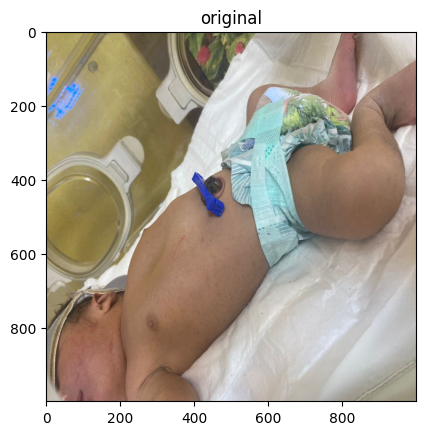

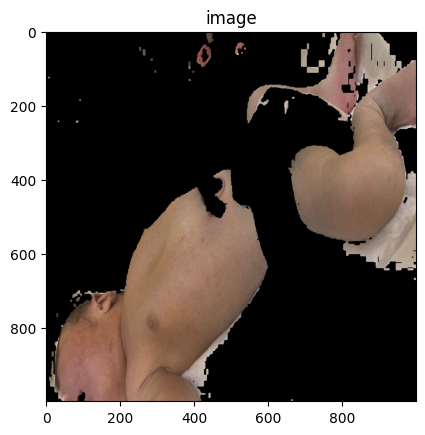

In [21]:
global_mask=cv2.bitwise_and(YCrCb_mask,HSV_mask)
global_mask=cv2.medianBlur(global_mask,3)
global_mask = cv2.morphologyEx(global_mask, cv2.MORPH_OPEN, np.ones((4,4), np.uint8))
global_img = cv2.bitwise_and(img,img,mask=global_mask)

plt.title("original")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()
plt.title("image")
plt.imshow(cv2.cvtColor(global_img,cv2.COLOR_BGR2RGB))
plt.show()

final code after every iteration

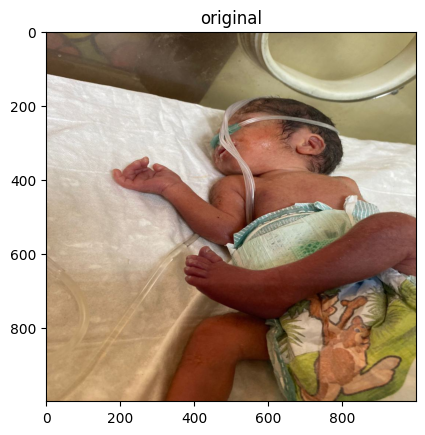

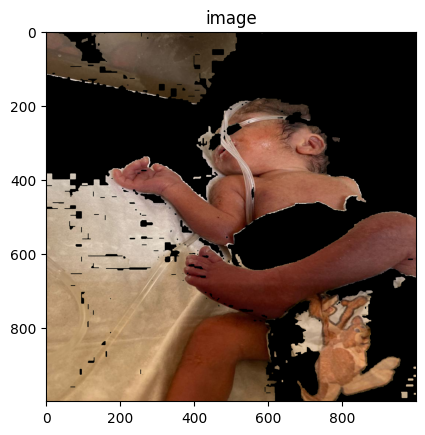

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread("./training/normal/normal (584).jpg")
# img=cv2.imread("./training/jaundice/jaundice (1).jpg") #brg

#converting from bgr to hsv color space
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#skin color range for h in hsv
HSV_mask = cv2.inRange(img_HSV[:,:,0], np.array((0)), np.array((17)))
HSV_mask = cv2.morphologyEx(HSV_mask,cv2.MORPH_OPEN,np.ones((3,3),np.uint8))

#converting from gbr to YCbCr color space
img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

#putting all values of y to 0
img_YCrCb[:,:,0] = 0

#skin color range for ycrcb color space 
YCrCb_mask = cv2.inRange(img_YCrCb, np.array((0, 135, 85)), np.array((255,180,135))) 
YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#global mask made from YCrCb mask and hsv mask
global_mask=cv2.bitwise_and(YCrCb_mask,HSV_mask)
global_mask=cv2.medianBlur(global_mask,3)
global_mask = cv2.morphologyEx(global_mask, cv2.MORPH_OPEN, np.ones((4,4), np.uint8))
global_img = cv2.bitwise_and(img,img,mask=global_mask)

plt.title("original")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()
plt.title("image")
plt.imshow(cv2.cvtColor(global_img,cv2.COLOR_BGR2RGB))
plt.show()

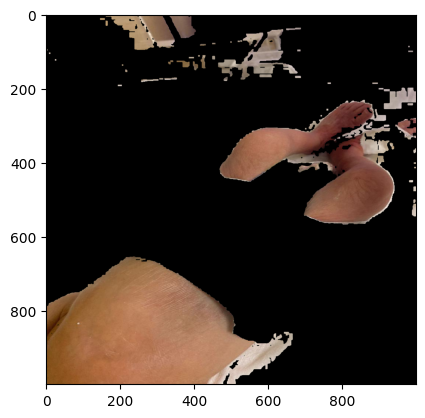

In [7]:
# our custom transformer to detect only skin

import cv2
import numpy as np

def custom_skin_detector(img):
    img = np.array(img)
    img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#skin color range for h in hsv
    HSV_mask = cv2.inRange(img_HSV[:,:,0], np.array((0)), np.array((17)))
    HSV_mask = cv2.morphologyEx(HSV_mask,cv2.MORPH_OPEN,np.ones((3,3),np.uint8))

    #converting from gbr to YCbCr color space
    img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

    #putting all values of y to 0
    img_YCrCb[:,:,0] = 0

    #skin color range for ycrcb color space 
    YCrCb_mask = cv2.inRange(img_YCrCb, np.array((0, 135, 85)), np.array((255,180,135))) 
    YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

    #global mask made from YCrCb mask and hsv mask
    global_mask=cv2.bitwise_and(YCrCb_mask,HSV_mask)
    global_mask=cv2.medianBlur(global_mask,3)
    global_mask = cv2.morphologyEx(global_mask, cv2.MORPH_OPEN, np.ones((4,4), np.uint8))
    global_img = cv2.bitwise_and(img,img,mask=global_mask)
    global_img = cv2.cvtColor(global_img,cv2.COLOR_BGR2RGB)
    return global_img

img=cv2.imread("./training/normal/normal (710).jpg")
plt.imshow(custom_skin_detector(img))
plt.show()